In [ ]:
# Sarah Burg
# Machine Learning
# CS379
# Due date: 4/9/23
# Unit 1 - Individual Project

In [ ]:
# SUPERVISED ALGORITHM
# Description: This program will predict if a passenger survived the Titanic

In [ ]:
# Importing libraries

# NumPy is used for working with multidimensional array objects.
import numpy as np

# Pandas is used for data manipulation and analysis.
import pandas as pd

# Seaborn is used for data visualization.
import seaborn as sns

# Matplotlib is a plotting library for creating static, animated, and interactive visualizations in Python.
# Pyplot is a MATLAB-styled interface.
import matplotlib.pyplot as plt

In [ ]:
# Loading dataset from seaborn.
titanic = sns.load_dataset('titanic')

In [ ]:
# Printing the first 10 rows of the dataset
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [ ]:
# Counting the number of rows and columns in the dataset
titanic.shape

(891, 15)

In [ ]:
# Get some statistics on numerical values
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Getting a count of the number of survivors
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

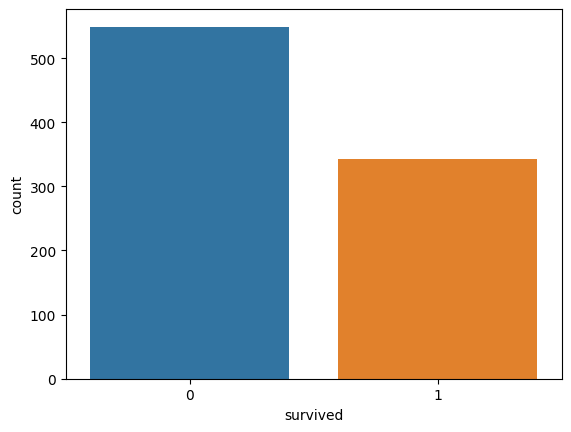

In [ ]:
# Visualization count of the survivors
sns.countplot(x = titanic['survived'])

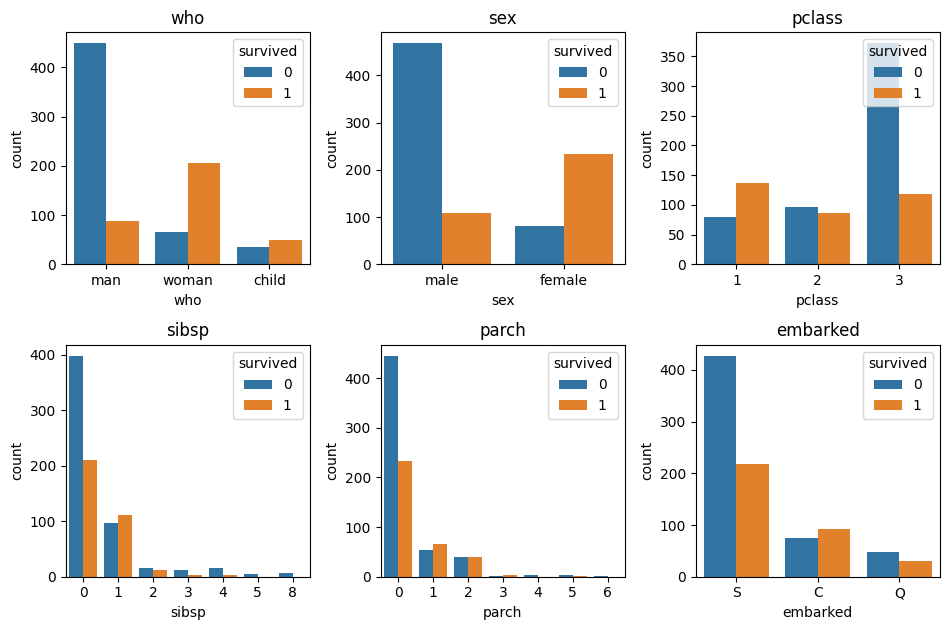

In [ ]:
# Visualization count of survivors for columns 
# 'who(man, woman, child)', 
# 'sex(male, female)', 
# 'pclass(1, 2, 3)', 
# 'sibsp(0, 1+ (1+ as in sibling or spouse with passenger))', 
# 'parch(0, 1+ (1+ as in parent or child with passenger))', 
# 'embarked(where passenger embarked from)'
cols = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']

n_rows = 2
n_cols = 3

# Creating subplot grid and figure size of each graph
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3.2, n_rows * 3.2))

for r in range(0, n_rows):
    for c in range(0, n_cols):  
        
        i = r * n_cols + c # Index to go through the number of columns      
        ax = axs[r][c] # Will show where to position each sub plot
        sns.countplot(x = titanic[cols[i]], hue = titanic["survived"], ax = ax)
        ax.set_title(cols[i])
        ax.legend(title = "survived", loc = 'upper right') 
        
plt.tight_layout()


In [ ]:
# Survival rate by sex
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [ ]:
# Looking at survival rate by sex and class
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<Axes: xlabel='sex'>

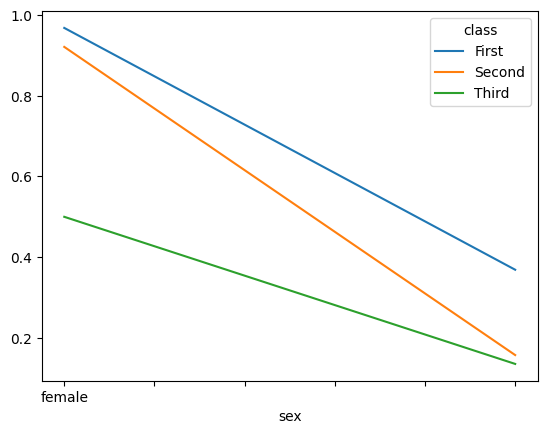

In [ ]:
# Looking at survival rate by sex and class visually
titanic.pivot_table('survived', index='sex', columns='class').plot()

<Axes: xlabel='class', ylabel='survived'>

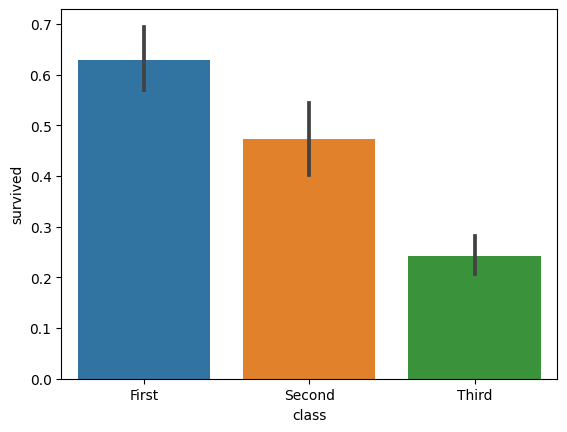

In [ ]:
# Plot survival rate of each class
# x-axis will contain class data and y-axis will contain survived data
sns.barplot(x = 'class', y = 'survived', data = titanic) 

In [ ]:
# Looking at survival rate by sex, age, and class.
age = pd.cut(titanic['age'], [0, 18, 80]) # Breaking up age and using 80 as the oldest because it showed 80 being the oldest in the dataset
titanic.pivot_table('survived', ['sex', age], 'class')



class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

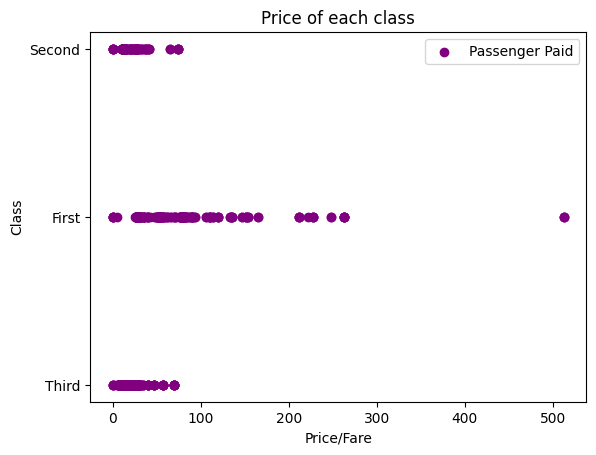

In [ ]:
# Plot the prices paid for each class
# fare will be x-axis and class will be y-axis
plt.scatter(titanic['fare'], titanic['class'], color = 'purple', label = 'Passenger Paid')
plt.ylabel('Class') #labeling y-axis
plt.xlabel('Price/Fare') #labeling x-axis
plt.title('Price of each class') #giving scatter graph a title
plt.legend() #adds the inside label inside the graph with "Passenger Paid" wording
plt.show() 

In [ ]:
# Counting the empty values in each column
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# Looking at all of the values in each column and get a count
for val in titanic:
  print(titanic[val].value_counts())
  print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [ ]:
from re import S
# Dropping redundant columns and columns missing too much data
titanic = titanic.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'alone', 'adult_male'], axis=1)

# Removing rows with missing data
titanic = titanic.dropna(subset=['embarked', 'age'])

In [ ]:
# Counting new number of rows and columns in the dataset
titanic.shape

(712, 8)

In [ ]:
# Looking at the data types
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [ ]:
# Print unique values in the columns
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [ ]:
# Importing LabelEncoder from sklearn.preprocessing to change sex and embarked to a number value
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# Encode sex column
titanic.iloc[:, 2] = labelencoder.fit_transform(titanic.iloc[:, 2].values)

# Encode embarked column
titanic.iloc[:, 7] = labelencoder.fit_transform(titanic.iloc[:, 7].values)

In [ ]:
# Print unique values in the columns after transform
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


In [ ]:
# All columns and now numerical
titanic.dtypes

survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
dtype: object

In [ ]:
# Split the data into independent 'X' and dependent 'Y' variables
X = titanic.iloc[:, 1:8].values
Y = titanic.iloc[:, 0].values

In [ ]:
# Spliting the dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
# Create a function within many machine learning models
def models(X_train, Y_train):

  # Using logistic regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)

  # Using Kneighbors
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  # Using SVC (linear kernel)
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  # Using SVC (RBF kernal)
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  # Using GaussianNB
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  # Using a Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  # Using RandomForestClassifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)

  # Print training accuracy for each model
  print('[0]Logistic Regression Training Accuracy: ', log.score(X_train, Y_train))
  print('[1]K Neighbors Training Accuracy: ', knn.score(X_train, Y_train))
  print('[2]SVC Linear Training Accuracy: ', svc_lin.score(X_train, Y_train))
  print('[3]SVS RBF Training Accuracy: ', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian NB Training Accuracy: ', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Training Accuracy: ', tree.score(X_train, Y_train))
  print('[6]Random Forest Training Accuracy: ', forest.score(X_train, Y_train))

  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [ ]:
# Get and train all of the models
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy:  0.7978910369068541
[1]K Neighbors Training Accuracy:  0.8664323374340949
[2]SVC Linear Training Accuracy:  0.7768014059753954
[3]SVS RBF Training Accuracy:  0.8506151142355008
[4]Gaussian NB Training Accuracy:  0.8031634446397188
[5]Decision Tree Training Accuracy:  0.9929701230228472
[6]Random Forest Training Accuracy:  0.9753954305799648


In [ ]:
# Showing confusion matrix and accuracy for all the models on the test data
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  # Extract true negative, false positive, false negative, and true positive values
  TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()

  test_score = (TP + TN) / (TP + TN + FN + FP)

  print(cm)
  print('Model[{}] Testing Accuracy = "{}"'.format(i, test_score))
  print()

[[75  7]
 [19 42]]
Model[0] Testing Accuracy = "0.8181818181818182"

[[67 15]
 [20 41]]
Model[1] Testing Accuracy = "0.7552447552447552"

[[70 12]
 [18 43]]
Model[2] Testing Accuracy = "0.7902097902097902"

[[75  7]
 [22 39]]
Model[3] Testing Accuracy = "0.7972027972027972"

[[69 13]
 [27 34]]
Model[4] Testing Accuracy = "0.7202797202797203"

[[54 28]
 [12 49]]
Model[5] Testing Accuracy = "0.7202797202797203"

[[73  9]
 [14 47]]
Model[6] Testing Accuracy = "0.8391608391608392"



In [ ]:
# Getting feature importance
forest = model[6]
importances = pd.DataFrame({'feature': titanic.iloc[:, 1:8].columns, 'importance': np.round(forest.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances

,importance
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


<Axes: xlabel='feature'>

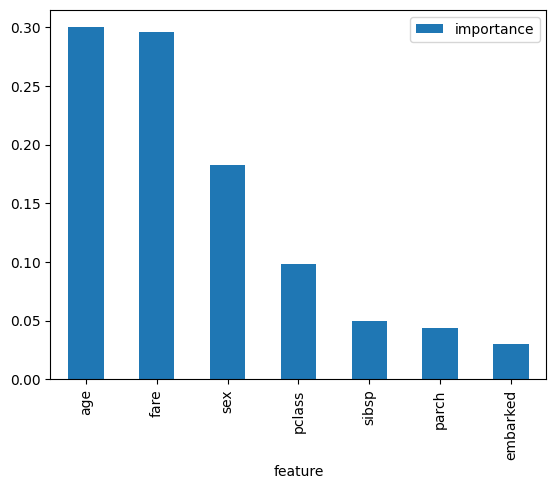

In [ ]:
# Visualize the importance
importances.plot.bar()

In [ ]:
# Print prediction of random forest classifier
pred = model[6].predict(X_test)
print(pred)

print()

# Print the actual values
print(Y_test)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [ ]:
# Sarahs' personal survival rate on the Titanic
my_survival = [[2, 0, 31, 1, 0, 150, 0]]

# Scaling my survival
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
fitted = sc.fit(X_train)
my_survival_scaled = fitted.transform(my_survival)

# Print prediction of my survival using Random Forest Classifier
pred = model[6].predict(my_survival_scaled)
print(pred)

if pred == 0:
  print('Did not make it :(')
else:
  print('Made it! :)')

[1]
Made it! :)


In [ ]:
# Thoughts and take aways:

# I followed along with the video and the creator did a good job explaining why we were going through
# all the steps we went through. Analyzing the data was interesting. Once we got to the different 
# machine learning models, it was educating going through them all. It was also interesting how they
# all came out with different results. Ultimately, we went with the random forest classifier because 
# it had the best predicitions when it came to both the training and testing. Depending on the sex, 
# passenger class, age, if the passenger was with someone (siblings, spouses, parents, child), the 
# fare rate, and where the passenger came from determined the survivability prediction.

In [ ]:
# References:

# Randerson112358. (Jul 22, 2019). Titanic Survival Prediction Using Machine Learning.
   # Retrieved from https://betterprogramming.pub/titanic-survival-prediction-using-machine-learning-4c5ff1e3fa16

# Pandas. (Apr 03, 2023). Pandas documentation.
   # Retrieved from https://pandas.pydata.org/docs/

# NumPy. (N.D.). What is NumPy? 
   # Retrieved from https://numpy.org/doc/stable/user/whatisnumpy.html

# GeeksforGeeks. (Jun 03, 2020). Introduction to Seaborn - Python.
   # Retrieved from https://www.geeksforgeeks.org/introduction-to-seaborn-python/